In [1]:
import pandas as pd
import random as rd
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("dataunklasifikasi.csv")

0 [[76. 80.  1.]
 [81. 79.  1.]
 [76. 80.  1.]
 [79. 77.  1.]
 [81. 78.  0.]
 [88. 91.  1.]
 [77. 81.  1.]
 [76. 76.  0.]
 [80. 84.  0.]] [1. 1. 1. 1. 0. 0. 1. 0. 1.] [0. 0. 0. 0. 0. 1. 0. 0. 1.] [[76. 80.  3.]
 [81. 79.  3.]
 [76. 80.  3.]
 [79. 77.  3.]
 [81. 78.  0.]
 [88. 91.  1.]
 [77. 81.  3.]
 [76. 76.  0.]
 [80. 84.  2.]]
1 [[80. 84.  0.]
 [83. 86.  1.]
 [74. 75.  1.]
 [82. 82.  1.]
 [85. 84.  0.]
 [78. 78.  0.]
 [79. 82.  1.]
 [85. 86.  0.]
 [79. 80.  0.]
 [89. 86.  1.]] [1. 0. 1. 0. 1. 0. 0. 1. 0. 0.] [1. 1. 0. 1. 1. 0. 1. 1. 0. 1.] [[80. 84.  2.]
 [83. 86.  1.]
 [74. 75.  3.]
 [82. 82.  1.]
 [85. 84.  2.]
 [78. 78.  0.]
 [79. 82.  1.]
 [85. 86.  2.]
 [79. 80.  0.]
 [89. 86.  1.]]
2 [[89. 86.  1.]
 [82. 84.  1.]
 [79. 83.  1.]
 [79. 80.  0.]
 [80. 84.  1.]
 [77. 77.  0.]
 [78. 83.  1.]
 [90. 95.  1.]
 [69. 73.  0.]] [0. 0. 1. 0. 0. 0. 1. 0. 1.] [1. 1. 0. 0. 1. 0. 0. 1. 1.] [[89. 86.  1.]
 [82. 84.  1.]
 [79. 83.  3.]
 [79. 80.  0.]
 [80. 84.  1.]
 [77. 77.  0.]
 [78. 83.  3.]

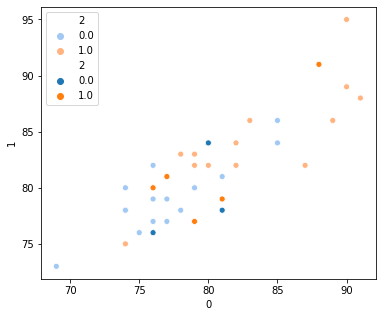

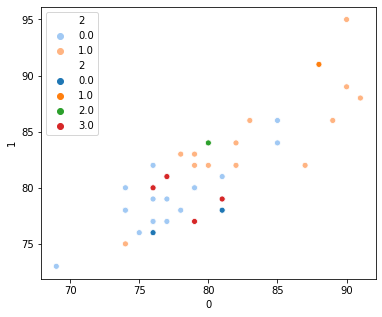

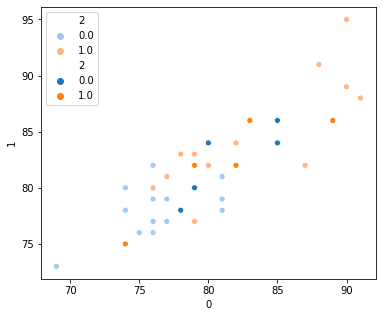

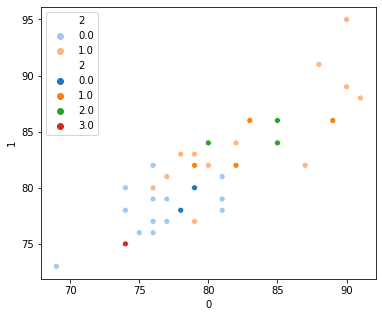

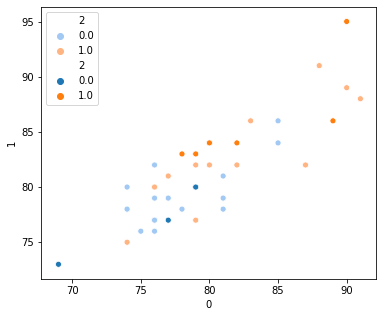

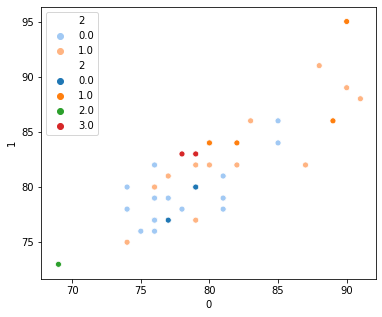

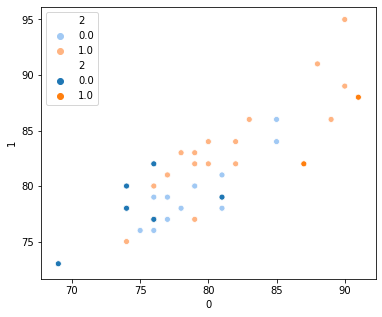

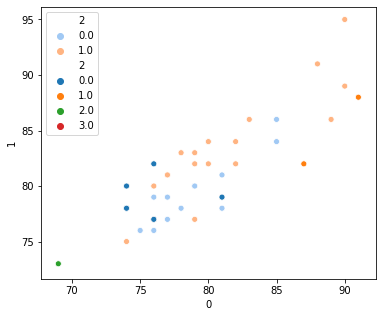

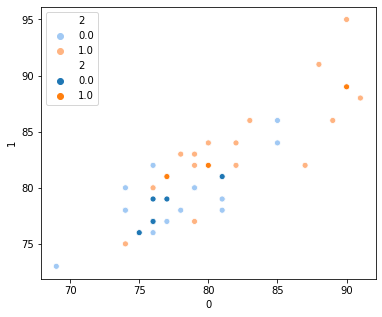

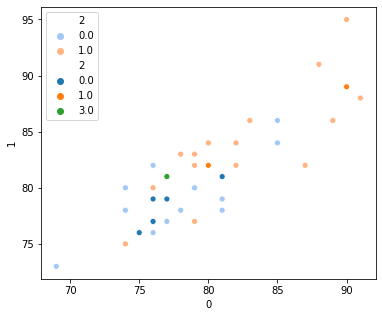

In [2]:
X=data.values
X=X.astype(float64)

#cross validation
#for k in range (15):
part=5
error_all=zeros((part))
for i in range (part):
    bb=int(floor(len(X)*(i)/part))
    ba=int(ceil(len(X)*(i+1)/part))
    train=X[0:bb,:]
    train=append(train,X[ba:len(X),:])
    train=train.reshape(int(len(train)/3),3)
    training=pd.DataFrame(train)
    test=X[bb:ba,:]
    testing=pd.DataFrame(test)
    fig, g = plt.subplots(figsize=(6,5))
    g =sns.scatterplot(x=0, y=1, hue=2,data=training, palette=("pastel"), legend='full')
    g =sns.scatterplot(x=0, y=1, hue=2,data=testing, palette=("tab10"), legend='full')
    

    c1=where (train[:,2]==0)[0]
    c2=where (train[:,2]==1)[0]

    x_mu=[average(train[c1,0]),average(train[c2,0])]
    x_var=[var(train[c1,0]),var(train[c2,0])]
    y_mu=[average(train[c1,1]),average(train[c2,1])]
    y_var=[var(train[c1,1]),var(train[c2,1])]

    #prior - Uniform
    p_c1=len(c1)/len(train)
    p_c2=1-p_c1
    
    a_all=[]
    error_every_part=0
    error_vector=[]
    for j in range (len(test)):
        #gaussian
        p_new_c1=((exp((-(test[j,0]-x_mu[0])**2)/(2*x_var[0])))/(sqrt(2*pi*x_var[0])))*((exp((-(test[j,1]-y_mu[0])**2)/(2*y_var[0])))/(sqrt(2*pi*y_var[0])))
        p_new_c2=((exp((-(test[j,0]-x_mu[1])**2)/(2*x_var[1])))/(sqrt(2*pi*x_var[1])))*((exp((-(test[j,1]-y_mu[1])**2)/(2*y_var[1])))/(sqrt(2*pi*y_var[1])))

        p_new1=p_new_c1*p_c1
        p_new2=p_new_c2*p_c2

        p1=p_new1/(p_new1+p_new2)
        p2=p_new2/(p_new1+p_new2)
        if p1>p2:
            a=0
        else:
            a=1
        a_all=append(a_all,a)
        error=abs(a-test[j,2])
        error_vector=append(error_vector,error)
        error_every_part+=error
    error_all[i]=error_every_part
    xx=zeros((len(test),3))
    xx[:,0]=test[:,0]
    xx[:,1]=test[:,1]
    for k in range (len(xx)):
        if error_vector[k]==0:
            xx[k,2]=a_all[k]
        else:
            xx[k,2]=test[k,2]+2
    print(i,test,error_vector,a_all,xx)
    dxx=pd.DataFrame(xx) 
    fig, g = plt.subplots(figsize=(6,5))
    g =sns.scatterplot(x=0, y=1, hue=2,data=training, palette=("pastel"), legend='full')
    g =sns.scatterplot(x=0, y=1, hue=2,data=dxx, palette=("tab10"), legend='full')
        #xnew_all.append(xnew)
        #ynew_all.append(ynew)
        #kelompok.append(a)

In [3]:
accuracy=(len(test)*5-sum(error_all))/(len(test)*5)